# LAB 3: Linear Transformation and Inverse


# First: you should run this cell

In [598]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def plot2d(H):
    x = H[0,:]
    y = H[1,:]
    plt.plot(x, y, 'ro', x, y, 'g-')
    plt.axis([-10, 10, -10, 10])
    plt.grid()

# Question 1: Geometry and Matrices

#### This question uses python to illustrate the geometric meaning of some special types of matrices.at next cell type:
- `plot2d(H)`

H = 
 [[-6 -6 -7  0  7  6  6 -3 -3  0  0 -6]
 [-7  2  1  8  1  2 -7 -7 -2 -2 -7 -7]]


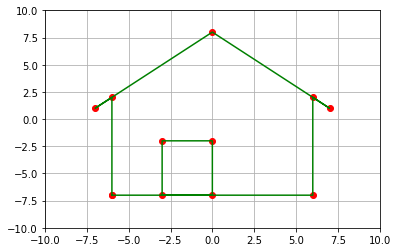

In [599]:
H = np.array([[-6,-6,-7, 0, 7, 6, 6,-3,-3, 0, 0,-6],[-7,2,1,8,1,2,-7,-7,-2,-2,-7,-7 ]])
print('H = \n', H)
plot2d(H)

A graphics window should open and display a crude drawing of a house. The matrix H contains the coordinates
of the endpoints of the line segments making up the drawing.

#### (a) Rotations: Generate a matrix Q and Let Q act on the house by plot2d(Q*H):

- `t = math.pi / 6`
- `Q = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])`
- Caculate `np.linalg.det(Q)`

##### Repeat this process with t = - pi/3 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

Q1 = 
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]

det(Q1) =  1.0


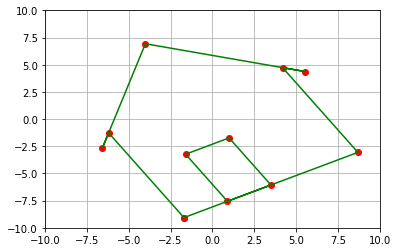

In [600]:
#type your code here:
t = math.pi / 6
Q1 = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])
print("Q1 = \n", Q1)
print("\ndet(Q1) = ", np.linalg.det(Q1))
plot2d(Q1 @ H)

Q2 = 
 [[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]

det(Q2) =  1.0


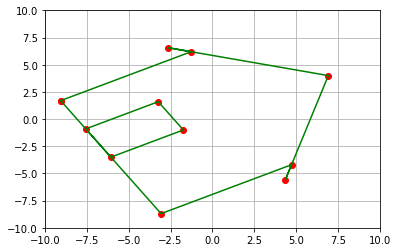

In [601]:
#type your code here:
t = - (math.pi / 3)
Q2 = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])
print("Q2 = \n", Q2)
print("\ndet(Q2) = ", np.linalg.det(Q2))
plot2d(Q2 @ H)

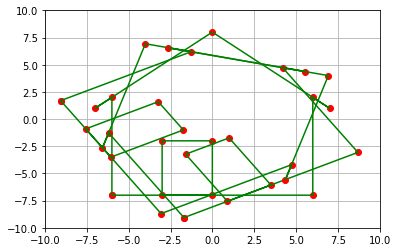

In [602]:
plot2d(H)
plot2d(Q1 @ H)
plot2d(Q2 @ H)

#### (b) Dilations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix D by
- `r = .9`
- `D = np.array([[r, 0], [0, 1 / r]])`
- Caculate `np.linalg.det(D)`

Let D act on the house by `plot2d(D*H)`.


#### Repeat this process with r = .8 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

D1 = 
 [[0.9        0.        ]
 [0.         1.11111111]]

det(D1) =  1.0


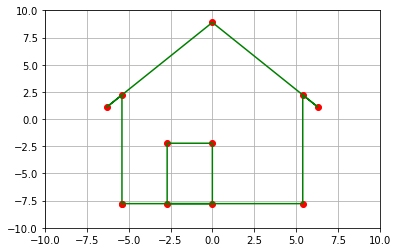

In [603]:
#type your code here:
r = 0.9
D1 = np.array([[r, 0], [0, 1/r]])
print("D1 = \n", D1)
print("\ndet(D1) = ", np.linalg.det(D1))
plot2d(D1 @ H)

D2 = 
 [[0.8  0.  ]
 [0.   1.25]]

det(D2) =  1.0


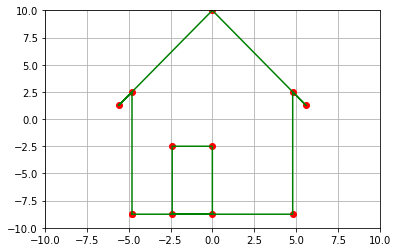

In [604]:
r = 0.8
D2 = np.array([[r, 0], [0, 1/r]])
print("D2 = \n", D2)
print("\ndet(D2) = ", np.linalg.det(D2))
plot2d(D2 @ H)

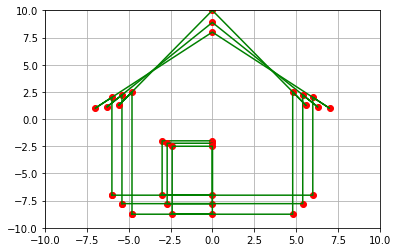

In [605]:
plot2d(H)
plot2d(D1 @ H)
plot2d(D2 @ H)

#### (c) Shearing Transformations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix T by

- `t = 1/2`
- `T = np.array([[1, t], [0, 1]])`
- - Caculate `np.linalg.det(T)`

Now let T act on the house by `plot2d(T*H)`.

#### Repeat this process with t = - 1/2 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure

T1 = 
 [[1.  0.5]
 [0.  1. ]]

det(T1) =  1.0


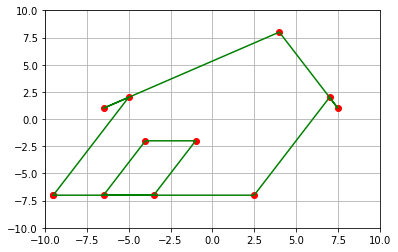

In [606]:
#type your code here:
t = 1/2
T1 = np.array([[1, t], [0, 1]])
print("T1 = \n", T1)
print("\ndet(T1) = ", np.linalg.det(T1))
plot2d(T1 @ H)

T2 = 
 [[ 1.  -0.5]
 [ 0.   1. ]]

det(T2) =  1.0


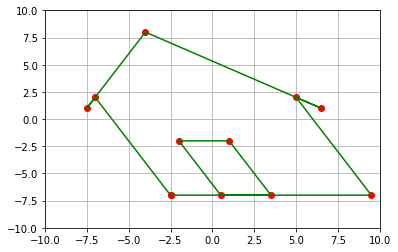

In [607]:
t = -1/2
T2 = np.array([[1, t], [0, 1]])
print("T2 = \n", T2)
print("\ndet(T2) = ", np.linalg.det(T2))
plot2d(T2 @ H)

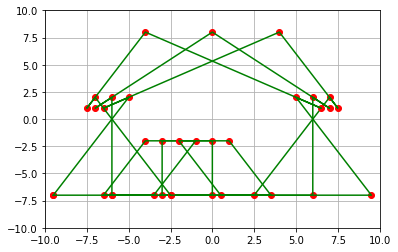

In [608]:
plot2d(H)
plot2d(T1 @ H)
plot2d(T2 @ H)

# Question 2: Solving $Ax = b$

Implementing a function to Solve $Ax = b$ using the inverse of $A$ without using `numpy.linalg.inv`

### Step 1: 

- Define a function that checks that A and b have correct dimensions (number of rows of $A$ = number of rows of $b$). `check_dimensions(A, b)`. Return a `boolean`.

In [609]:
def check_dimensions(A, b):
    ##########type your code here#############
    return A.shape[0] == b.shape[0]
    ##########################################

### Step 2:
- Define a function that takes a matrix and check if it is a squared matrix. `check_squared(A)`. Return a `boolean`.

In [610]:
def check_squared(A):
    ##########type your code here#############
    return A.shape[0] == A.shape[1]
    ##########################################

### Step 3: 
- Define a function that takes a matrix and the indices of a column and a row and returns the corresponding minor coefficient. `minor_coef(A, i, j)`.

In [611]:
def minor_coef(A, i, j):
    ##########type your code here#############
    sub_A = np.delete(A,i,0)     
    sub_A = np.delete(sub_A,j,1) 
    return np.linalg.det(sub_A)  
    ##########################################

### Step 4:
- Define a function that takes a matrix and gives its matrix of minors. `minors(A)`.

In [612]:
def minors(A):
    M = np.zeros(A.shape)
    ##########type your code here#############
    m, n = np.shape(A)   
    for i in range(0, m):
        for j in range(0, n):
            M[i][j] = minor_coef(A, i, j)
    ##########################################
    return M

### Step 5:
- Define a function that takes matrix $A$ gives a matrix of cofactors. `cofactors(A)`

In [613]:
def cofactors(A):
    M = minors(A)
    C = np.zeros(M.shape)
    ##########type your code here#############
    for i in range(C.shape[0]):
        for j in range(C.shape[0]):
            C[i][j] = (-1)**(i + j) * M[i][j]
    ##########################################
    return C

### Step 6:
- Define a function that takes a matrix and gives its transpose. `transpose(A)`

In [614]:
def transpose(A):
    A_T = np.zeros(A.shape)
    ##########type your code here#############
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[0]):
            A_T[i][j] = A[j][i]
    ##########################################
    return A_T

### Step 7:
- Code a function that gives the inverse of a matrix. `inverse(A)`.
    - Check first if the matrix is a square matrix. If not raise an error.
    - Check if the matrix is invertible. If not raise an error.

In [615]:
def inverse(A): 
    if not check_squared(A):
        raise Exception('A is not a square matrix.')
    d = np.linalg.det(A)
    if abs(d) < 10 ** -10:
        raise Exception('Singular matrix: A is not invertible.')
    ##########type your code here#############
    return (1/d) * (transpose(cofactors(A)))
    ##########################################

### Step 8:
- Define a function that takes a matrix $A$, a vector $b$ and gives the vector $x$ solution of $Ax = b$. `solve(A, b)`.
- Check dimension first if not raise an error.

In [616]:
def solve(A, b): 
    if not check_dimensions(A, b):
        raise Exception('Inconsistent Dimensions.')
        ##########type your code here#############
    x = inverse(A) @ b
    return x
        ##########################################

### Step 9:
- Use the function `solve` in the previous step to solve the following systems of linear equations:

1) $x + 2y = -1$; $3x + 4y = 1$

2) $3x - 2y + z = 7$; $x + z = 2$; $-2y - z = 3$

In [617]:
#type your code here:
A = np.array ([ [1, 2], [3, 4] ])
b = np.array([ [-1], [1] ])
x = solve(A, b)

print("A = \n", A)
print("\nb = \n", b)
print("\nx = \n", x)
print("\nA @ x = \n", A @ x)

A = 
 [[1 2]
 [3 4]]

b = 
 [[-1]
 [ 1]]

x = 
 [[ 3.]
 [-2.]]

A @ x = 
 [[-1.]
 [ 1.]]


In [618]:
#type your code here:
A = np.array ([ [3, -2, 1], [1, 0, 1], [0, -2, -1] ])
b = np.array([ [7], [2], [3] ])
x = solve(A, b)

print("A = \n", A)
print("\nb = \n", b)
print("\nx = \n", x)
print("\nA @ x = \n", A @ x)

A = 
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b = 
 [[7]
 [2]
 [3]]

x = 
 [[ 0. ]
 [-2.5]
 [ 2. ]]

A @ x = 
 [[7.]
 [2.]
 [3.]]


### Step 10:
- Error testing: Run the following cells to test the erros.

In [619]:
A = np.array([[3, -2, 1],
              [1, 0, 1],
              [0, -2, -1]])

b = np.array([[7],
              [2]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b =
 [[7]
 [2]]



Exception: Inconsistent Dimensions.

In [620]:
A = np.array([[3, 1],
              [-2, 0],
              [1, 1]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3  1]
 [-2  0]
 [ 1  1]]

b =
 [[7]
 [2]
 [3]]



Exception: A is not a square matrix.

In [621]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b =
 [[7]
 [2]
 [3]]



Exception: Singular matrix: A is not invertible.